In [1]:
import os
from dotenv import load_dotenv , find_dotenv
load_dotenv(find_dotenv(),override=True)

True

In [2]:
pip install -q pinecone-client

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pinecone import Pinecone
pc=Pinecone()
pc.list_indexes()

{'indexes': []}

In [7]:
from pinecone import ServerlessSpec
index_name='langchain'
if index_name not in pc.list_indexes().names():
    print(f'create index: {index_name}')
    pc.create_index(
     name=index_name,
    dimension=1536,
    metric='cosine',
    spec=ServerlessSpec( 
                        cloud='aws',
                        region='us-east-1'
    )
    )
    print('index is created')
else:
    print(f'index {index_name} already exist!..')

index langchain already exist!..


In [5]:
index_name='mypinecone'
if index_name in pc.list_indexes().names():
    print(f'delete the index {index_name}')
    pc.delete_index(index_name)
    print('done!..')
else:
    print(f'Index {index_name} does not exist!..')

Index mypinecone does not exist!..


In [8]:
index=pc.Index(index_name)
index.describe_index_stats()


{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

### working with Vector

In [12]:
import random

vectors = [[random.random() for _ in range(1536)] for v in range(5)]

print(vectors)

[[0.5258682597676408, 0.10944384582137046, 0.8206054451065614, 0.8075670061607495, 0.7569055762657599, 0.046456162318763705, 0.7790053368516053, 0.18651050734601993, 0.49961809995254236, 0.9450574357731001, 0.008940473656446346, 0.9243610257762593, 0.36061501952864317, 0.8573584190884137, 0.27263349186508135, 0.9512875659005375, 0.006656672263583019, 0.6323542264228678, 0.9815169713011742, 0.05338921566791299, 0.18794203483021732, 0.5592712369310342, 0.3050297890644931, 0.42209944340830186, 0.23982964921689798, 0.021448343280111803, 0.9174964175186894, 0.9043439626155563, 0.719268218369203, 0.9924706139824465, 0.45989190286544757, 0.055917807814724885, 0.5070462936716207, 0.2398737628783445, 0.9335864862437143, 0.2244577582404612, 0.007075180462051134, 0.14005356088727094, 0.7436854403275033, 0.32144891648895557, 0.9629224960696325, 0.40515509809356154, 0.7676147577499742, 0.13282833025510543, 0.49948678118520407, 0.06916321895450228, 0.37030821680437076, 0.7625553581262089, 0.03990640

In [13]:
import random

vectors = [[random.random() for _ in range(1536)] for v in range(5)]
ids=list('abcde')
index_name='langchain'
index=pc.Index(index_name)
index.upsert(vectors=zip(ids,vectors))

{'upserted_count': 5}

In [19]:
index.upsert(vectors=[('c',[0.5]*1536)])

{'upserted_count': 1}

In [20]:
index.fetch(ids=['c','d'])

{'namespace': '',
 'usage': {'read_units': 1},
 'vectors': {'c': {'id': 'c',
                   'values': [0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
             

In [21]:
query_vector=[random.random() for _ in range(1536)]


In [25]:
index.query(vector=query_vector,
            top_k=3,
            include_values=False
           )

{'matches': [{'id': 'c', 'score': 0.864179313, 'values': []},
             {'id': 'b', 'score': 0.760847807, 'values': []},
             {'id': 'a', 'score': 0.75955534, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}

In [26]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}

In [29]:
from pinecone import ServerlessSpec
index_name='myfirstpinecone'
if index_name not in pc.list_indexes().names():
    print(f'create index: {index_name}')
    pc.create_index(
     name=index_name,
    dimension=1536,
    metric='cosine',
    spec=ServerlessSpec( 
                        cloud='aws',
                        region='us-east-1'
    )
    )
    print('index is created')
else:
    print(f'index {index_name} already exist!..')

index myfirstpinecone already exist!..


In [33]:
index=pc.Index('myfirstpinecone')
import random

vectors = [[random.random() for _ in range(1536)] for v in range(5)]
ids=list('abcde')
index.upsert(vectors=zip(ids,vectors))



{'upserted_count': 5}

In [38]:
vectors = [[random.random() for _ in range(1536)] for v in range(3)]
ids=list('xyz')
index.upsert(vectors=zip(ids,vectors),namespace='firstSpace')

{'upserted_count': 3}

In [39]:
vectors = [[random.random() for _ in range(1536)] for v in range(2)]
ids=list('pq')
index.upsert(vectors=zip(ids,vectors),namespace='secondSpace')

{'upserted_count': 2}

In [40]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5},
                'firstSpace': {'vector_count': 3},
                'secondSpace': {'vector_count': 4}},
 'total_vector_count': 12}

In [45]:
index.fetch(ids=['p'],namespace='secondSpace')

{'namespace': 'secondSpace',
 'usage': {'read_units': 1},
 'vectors': {'p': {'id': 'p',
                   'values': [0.072659716,
                              0.962763429,
                              0.030835174,
                              0.574509382,
                              0.174034074,
                              0.318196744,
                              0.774553657,
                              0.91177845,
                              0.00283489842,
                              0.778009892,
                              0.715400219,
                              0.43762964,
                              0.815076709,
                              0.354965538,
                              0.131145909,
                              0.758664489,
                              0.115753822,
                              0.521467507,
                              0.348514199,
                              0.149341196,
                              0.355509251,
         

In [46]:
index.delete(delete_all=True,namespace='secondSpace')

{}

In [47]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5}, 'firstSpace': {'vector_count': 6}},
 'total_vector_count': 11}

In [48]:
pip install -q pillow

Note: you may need to restart the kernel to use updated packages.


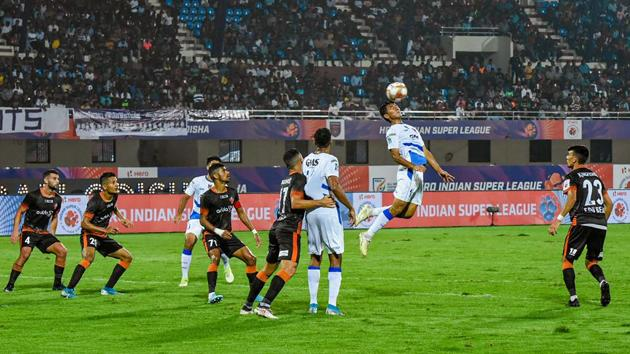

In [49]:
from PIL import Image
img=Image.open('football-match-in-bhubaneswar_294d406a-4f4e-11ea-be2e-10ce700f7947.jpg')
img

In [50]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv,find_dotenv
load_dotenv(find_dotenv(),override=True)

llm =ChatGoogleGenerativeAI(model='gemini-pro-vision')
prompt='whta is in this image'
message= HumanMessage(
    content=[
    {'type':'text','text':prompt},
    {'type':'image_url','image_url':img}
    ]
)

response=llm.invoke([message])
print(response.content)

AttributeError: startswith

In [51]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')
prompt = 'what is in this image'
img = 'football-match-in-bhubaneswar_294d406a-4f4e-11ea-be2e-10ce700f7947.jpg'  # Replace with your actual image URL

# Create separate messages for text and image
text_message = HumanMessage(content=prompt)
image_message = HumanMessage(content=img)

# Invoke the model with both messages
response = llm.invoke([text_message, image_message])
print(response.content)


ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 Add an image to use models/gemini-pro-vision, or switch your model to a text model.